In [171]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random as npr

In [172]:
def schwartz_1factor(S0,mean,volatility,T=1,time=252,N=100,kappa=1):
    X = np.zeros((N,time+1))
    S = np.zeros((N,time+1))
    dt = T/time
    mu = mean
    sigma = volatility
    X[:,0] = np.log(S0)
    #S[:,0] = S0
    #alpha = mu
    alpha = mu - ((sigma ** 2) / (2*kappa))
    for i in range(1,time + 1):
        phi = npr.normal(0,1,N)
        X[:,i] = X[:,i-1] + kappa * (alpha - X[:,i-1]) * dt + sigma * phi * np.sqrt(dt)
        #S[:,i] = S[:,i-1] * ( 1 + kappa * (mu - np.log(S[:,i-1])) * dt + sigma * phi * np.sqrt(dt))
    return X
    #return S

In [173]:
#Parameters
S0 = 100  # Initial price
X0 = np.log(100) # Initial log price
kappa = 1  # Speed of mean reversion
mean = np.log(90)  # Long-term mean
volatility = 0.2  # Volatility
T = 1  # Total time (1 year)
time = 252
dt = T/time
N = 1000  # Number of paths to simulate

df = schwartz_1factor(S0,mean,volatility,T,time,N,kappa)

In [174]:
df_mean = df.mean(axis=0)
df_var = df.var(axis=0)

In [175]:
# Analytical expected price and variance of S or X
def expected_log_price(X0, mean, kappa, t):
    return X0 * np.exp(-kappa * t) + mean * (1 - np.exp(-kappa * t))

def variance_log_price(volatility, kappa, t):
    return (volatility ** 2) / (2 * kappa) * (1 - np.exp(-2 * kappa * t))

times = np.linspace(0, T* 252, time + 1)

E_Xt = np.array([expected_log_price(np.log(S0), mean, kappa, t) for t in times])
Var_Xt = np.array([variance_log_price(volatility, kappa, t) for t in times])

E_St = np.exp(E_Xt + 0.5 * Var_Xt)
Var_St = (np.exp(Var_Xt) - 1) * np.exp(2 * E_Xt + Var_Xt)

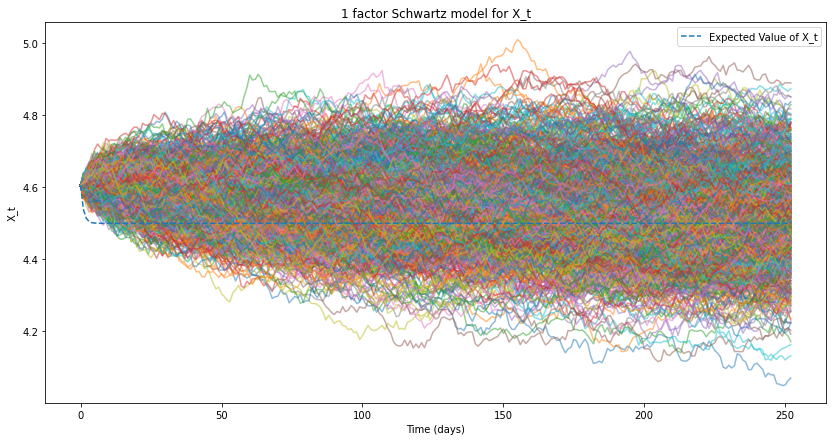

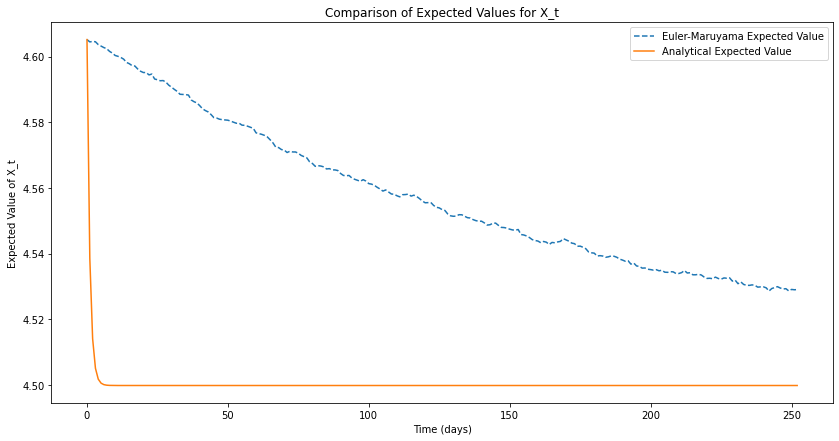

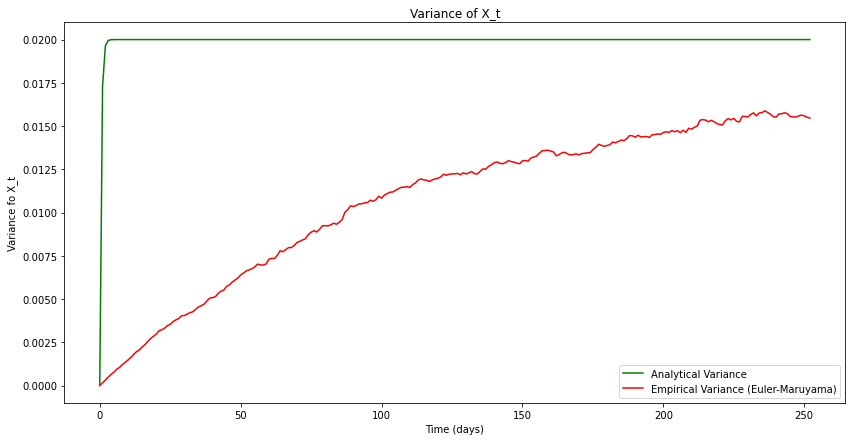

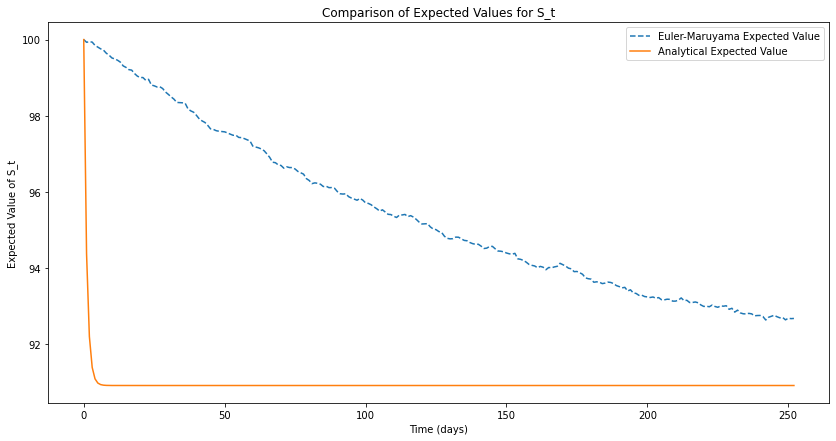

In [177]:
#X_t
# Plot the results
plt.figure(figsize=(14, 7))
for i in range(N):
    plt.plot(times, df[i],alpha = 0.5)
plt.plot(times, E_Xt, label='Expected Value of X_t', linestyle='--')
plt.title('1 factor Schwartz model for X_t')
plt.xlabel('Time (days)')
plt.ylabel('X_t')
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(times, df_mean, label='Euler-Maruyama Expected Value', linestyle='--')
plt.plot(times, E_Xt, label='Analytical Expected Value', linestyle='-')
plt.title('Comparison of Expected Values for X_t')
plt.xlabel('Time (days)')
plt.ylabel('Expected Value of X_t')
plt.legend()
plt.show()


# Plotting variance paths with analytical and empirical variances
plt.figure(figsize=(14, 7))

plt.plot(times, Var_Xt, label='Analytical Variance', color='green')
plt.plot(times, df_var, label='Empirical Variance (Euler-Maruyama)', color='red')
plt.title('Variance of X_t')
plt.xlabel('Time (days)')
plt.ylabel('Variance fo X_t')
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(times, np.exp(df_mean), label='Euler-Maruyama Expected Value', linestyle='--')
plt.plot(times, E_St, label='Analytical Expected Value', linestyle='-')
plt.title('Comparison of Expected Values for S_t')
plt.xlabel('Time (days)')
plt.ylabel('Expected Value of S_t')
plt.legend()
plt.show()

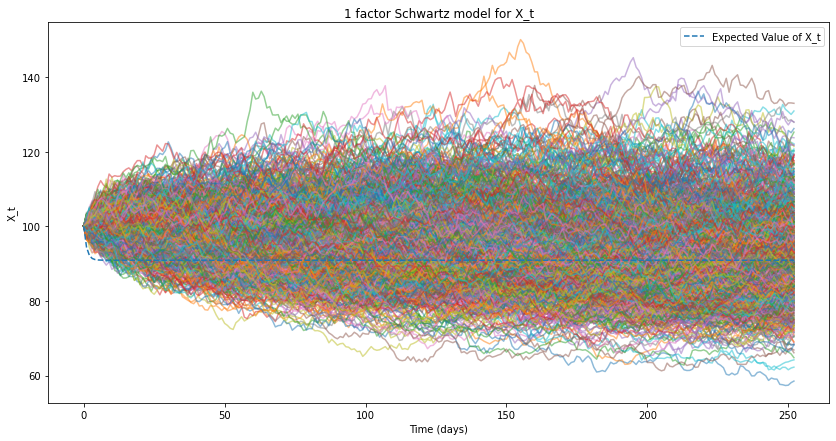

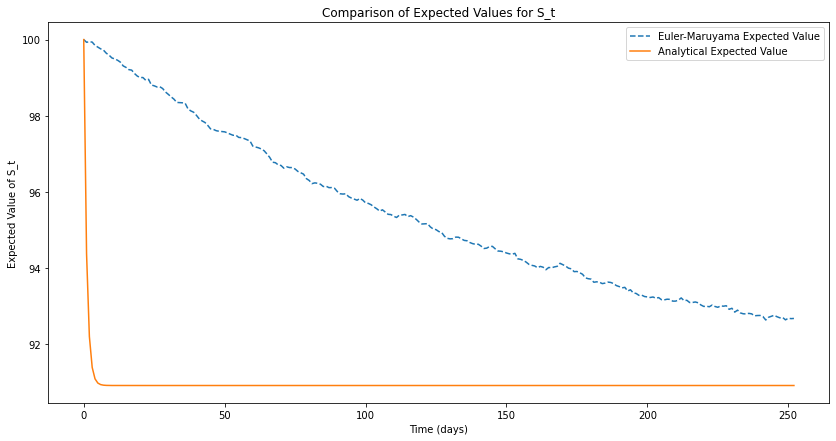

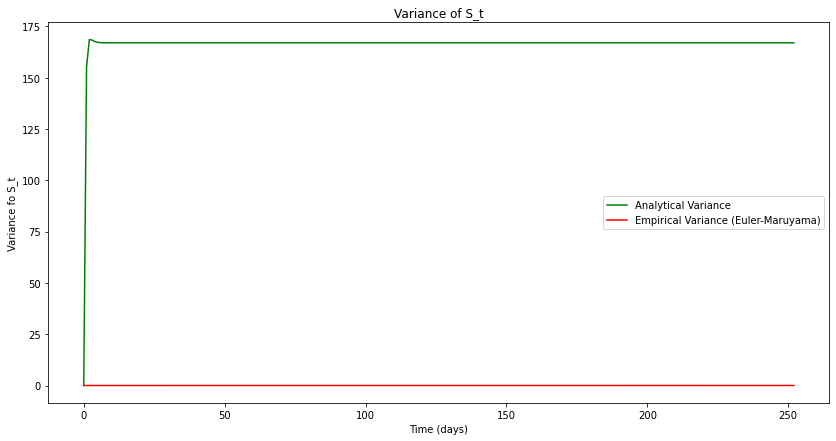

In [179]:
#S_t
# Plot the results
plt.figure(figsize=(14, 7))
for i in range(N):
    plt.plot(times, np.exp(df[i]),alpha = 0.5)
plt.plot(times, E_St, label='Expected Value of X_t', linestyle='--')
plt.title('1 factor Schwartz model for X_t')
plt.xlabel('Time (days)')
plt.ylabel('X_t')
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(times, np.exp(df_mean), label='Euler-Maruyama Expected Value', linestyle='--')
plt.plot(times, E_St, label='Analytical Expected Value', linestyle='-')
plt.title('Comparison of Expected Values for S_t')
plt.xlabel('Time (days)')
plt.ylabel('Expected Value of S_t')
plt.legend()
plt.show()


# Plotting variance paths with analytical and empirical variances
plt.figure(figsize=(14, 7))

plt.plot(times, Var_St, label='Analytical Variance', color='green')
plt.plot(times, df_var, label='Empirical Variance (Euler-Maruyama)', color='red')
plt.title('Variance of S_t')
plt.xlabel('Time (days)')
plt.ylabel('Variance fo S_t')
plt.legend()
plt.show()

In [143]:
# t = 1 with 1000 paths

# mean
print("mean: ", df[:,1].mean())

# variance
print("variance: ", df[:,1].var())
# 5th percentile
print("5th percentile: ", np.percentile(df[:,1], 5))

# 95th percentile

print("95th percentile: ",np.percentile(df[:,1], 95))



mean:  4.604056174415784
variance:  0.00016278460180325728
5th percentile:  4.582353998148881
95th percentile:  4.625915558431685


In [144]:
df_var

array([3.33293732e-27, 1.62784602e-04, 3.13793962e-04, 4.48883654e-04,
       5.88628915e-04, 7.33564915e-04, 8.80885836e-04, 1.03256138e-03,
       1.21593223e-03, 1.35855256e-03, 1.53991570e-03, 1.65789584e-03,
       1.76864791e-03, 1.91126068e-03, 2.01915051e-03, 2.16205546e-03,
       2.26198072e-03, 2.42071830e-03, 2.54343607e-03, 2.69021977e-03,
       2.80435858e-03, 2.93747010e-03, 3.07295694e-03, 3.15150793e-03,
       3.35399582e-03, 3.46605098e-03, 3.58872224e-03, 3.66625114e-03,
       3.97992868e-03, 4.07846612e-03, 4.16679887e-03, 4.38199805e-03,
       4.51600491e-03, 4.66108855e-03, 4.83156261e-03, 4.92891271e-03,
       5.02843311e-03, 5.15218385e-03, 5.29863865e-03, 5.35040108e-03,
       5.51812602e-03, 5.67329344e-03, 5.85589281e-03, 6.00780492e-03,
       6.16290757e-03, 6.21030417e-03, 6.41342099e-03, 6.52700422e-03,
       6.61688095e-03, 6.74651368e-03, 6.97232738e-03, 7.03618166e-03,
       7.08855913e-03, 7.31496749e-03, 7.44331109e-03, 7.73022469e-03,
      

In [145]:
Var_St

array([  0.        , 155.3460509 , 168.52691524, 168.26631116,
       167.52404584, 167.16578834, 167.02257757, 166.9683541 ,
       166.94819838, 166.94075537, 166.93801343, 166.93700421,
       166.93663287, 166.93649625, 166.93644599, 166.9364275 ,
       166.9364207 , 166.9364182 , 166.93641728, 166.93641694,
       166.93641681, 166.93641677, 166.93641675, 166.93641675,
       166.93641674, 166.93641674, 166.93641674, 166.93641674,
       166.93641674, 166.93641674, 166.93641674, 166.93641674,
       166.93641674, 166.93641674, 166.93641674, 166.93641674,
       166.93641674, 166.93641674, 166.93641674, 166.93641674,
       166.93641674, 166.93641674, 166.93641674, 166.93641674,
       166.93641674, 166.93641674, 166.93641674, 166.93641674,
       166.93641674, 166.93641674, 166.93641674, 166.93641674,
       166.93641674, 166.93641674, 166.93641674, 166.93641674,
       166.93641674, 166.93641674, 166.93641674, 166.93641674,
       166.93641674, 166.93641674, 166.93641674, 166.93

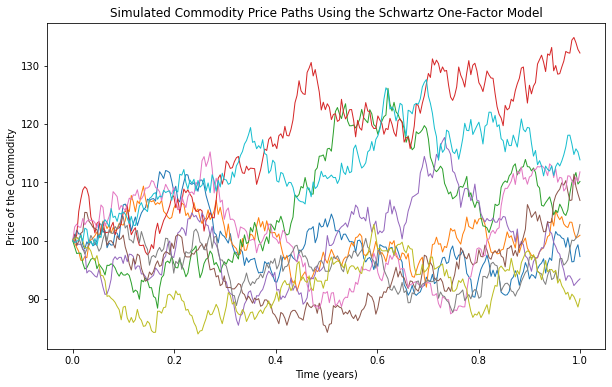

Expected price at time T: 100.61067590200078
Variance of price at time T: 168.80587186270898


0.0001537074667095748

In [180]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Schwartz one-factor model
alpha = 1  # Speed of mean reversion
mu = np.log(100)  # Long-term mean of the log price
sigma = 0.2  # Volatility
S0 = 100  # Initial price of the commodity
T = 1.0  # Time to maturity
dt = 1/252  # Time step in years, assuming 252 trading days in a year
n = int(T / dt)  # Number of time steps
num_paths = 1000  # Number of simulation paths

def simulate_schwartz_one_factor(S0, alpha, mu, sigma, T, dt, num_paths):
    n = int(T / dt)
    paths = np.zeros((num_paths, n))
    paths[:, 0] = S0
    for i in range(1, n):
        dw = np.random.normal(scale=np.sqrt(dt), size=num_paths)
        paths[:, i] = paths[:, i - 1] * np.exp((mu - alpha * np.log(paths[:, i - 1])) * dt + sigma * dw)
    return paths

# Simulate the price paths
price_paths = simulate_schwartz_one_factor(S0, alpha, mu, sigma, T, dt, num_paths)

# Plot the first 10 price paths
plt.figure(figsize=(10, 6))
for i in range(min(num_paths, 10)):  # Just plot the first 10 paths for clarity
    plt.plot(np.linspace(0, T, n), price_paths[i], lw=1)

plt.xlabel('Time (years)')
plt.ylabel('Price of the Commodity')
plt.title('Simulated Commodity Price Paths Using the Schwartz One-Factor Model')
plt.show()

# Calculating mean and variance at final time T for all paths
final_prices = price_paths[:, -1]
mean_price_T = np.mean(final_prices)
variance_price_T = np.var(final_prices)

print(f"Expected price at time T: {mean_price_T}")
print(f"Variance of price at time T: {variance_price_T}")

np.var(np.log(price_paths[:,1]))

In [181]:
np.log(100)

4.605170185988092

In [182]:
alpha = 1
mu = np.log(100)
sigma = 0.2
S0 = 100
X0 = np.log(S0)

expected_X1 = X0 * np.exp(-alpha) + mu * (1 - np.exp(-alpha))
variance_X1 = (sigma**2) / (2 * alpha) * (1 - np.exp(-2 * alpha))

analytical_variance_S1 = (np.exp(variance_X1) * (np.exp(2 * expected_X1 + variance_X1) - np.exp(2 * expected_X1)))

print(f"Analytical Variance of S at time T=1: {analytical_variance_S1}")


Analytical Variance of S at time T=1: 177.47971326203813


In [183]:
num_paths = 1000
dt = 1/252
n = int(T / dt)  # Number of time steps for 1 year

def simulate_schwartz_one_factor_log(S0, alpha, mu, sigma, dt, n, num_paths):
    paths = np.zeros((num_paths, n))
    paths[:, 0] = np.log(S0)
    for i in range(1, n):
        dw = np.random.normal(scale=np.sqrt(dt), size=num_paths)
        paths[:, i] = paths[:, i - 1] + (mu - alpha * paths[:, i - 1]) * dt + sigma * dw
    return paths

log_price_paths = simulate_schwartz_one_factor_log(S0, alpha, mu, sigma, dt, n, num_paths)
numerical_variance_X1 = np.var(log_price_paths[:, -1])

print(f"Numerical Variance of X at time T=1: {numerical_variance_X1}")


Numerical Variance of X at time T=1: 0.017323335785804497


In [184]:
log_price_paths

array([[4.60517019, 4.60240804, 4.59417255, ..., 4.63556994, 4.6374149 ,
        4.62320163],
       [4.60517019, 4.59581623, 4.58147414, ..., 4.72436571, 4.7288813 ,
        4.73032277],
       [4.60517019, 4.59476582, 4.59151044, ..., 4.59058791, 4.5835015 ,
        4.55917558],
       ...,
       [4.60517019, 4.63832525, 4.63704606, ..., 4.67867858, 4.67660254,
        4.6766629 ],
       [4.60517019, 4.58913151, 4.60434687, ..., 4.55982828, 4.55836854,
        4.54031233],
       [4.60517019, 4.6373157 , 4.6375683 , ..., 4.7345078 , 4.77341392,
        4.76781306]])